## Import library Pandas

In [171]:
import pandas as pd
import numpy as np
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Import the dataset  and cleanup dataset

In [172]:
url='Fire_Data.xlsx'
df=pd.read_excel(url)
df

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79234 entries, 0 to 79233
Data columns (total 15 columns):
OBJECTID      79234 non-null int64
LATITUDE      79234 non-null float64
LONGITUDE     79234 non-null float64
BRIGHT_TI4    79234 non-null float64
SCAN          79234 non-null float64
TRACK         79234 non-null float64
ACQ_DATE      79234 non-null datetime64[ns]
ACQ_TIME      79234 non-null int64
SATELLITE     79234 non-null object
INSTRUMENT    79234 non-null object
CONFIDENCE    79234 non-null object
VERSION       79234 non-null int64
BRIGHT_TI5    79234 non-null float64
FRP           79234 non-null float64
TYPE          79234 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(4), object(3)
memory usage: 9.1+ MB


In [174]:
df=df[df['ACQ_DATE'] < "2019-12-06"]

In [175]:
df['NEWTIME'] = df['ACQ_TIME']

In [176]:
df['NEWTIME'] = df['NEWTIME'].astype(str).str.zfill(4)

In [177]:
df['NEWTIME'] = df['NEWTIME'].str.slice(stop=2)+':'+df['NEWTIME'].str.slice(start=2)

In [178]:
df['NEWTIME'] = pd.to_datetime(df['ACQ_DATE'].astype(str)+' '+df['NEWTIME'])

In [179]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
NEWTIME       datetime64[ns]
dtype: object

In [180]:
df['TIME_Z'] = pd.to_datetime(df['NEWTIME'] ,unit='s' ,origin='unix')

In [181]:
df['UNIXTIME']=(df['TIME_Z'] - df['TIME_Z'].iloc[0]).dt.total_seconds()

In [182]:
#create new DataFrame 
#เก็บ columns : 'LATITUDE','LONGITUDE','TIME_Z','UNIXTIME'

df_active =df[['LATITUDE','LONGITUDE','TIME_Z','UNIXTIME']]

## Import library matplotlib

In [183]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
#Set up figure size and DPI for screen demo
plt.rcParams['figure.figsize']=(4,3)
plt.rcParams['figure.dpi']=120

In [185]:
# Group datetime into 1 Hour time windows, this will help to index the 1 Hour window with indexing
hour_df_splitted = [g for n, g in df_active.groupby(pd.Grouper(key='TIME_Z',freq='H'))]

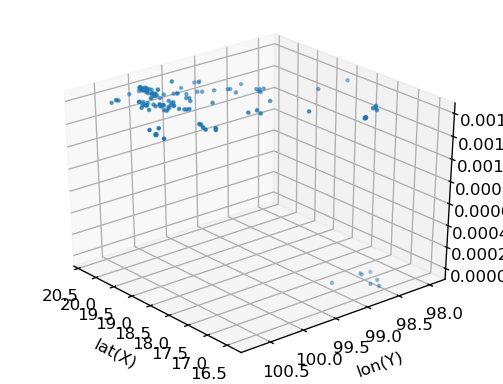

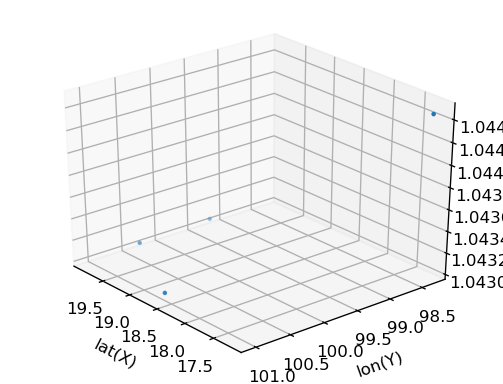

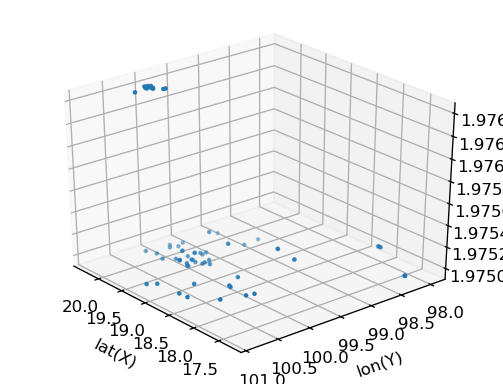

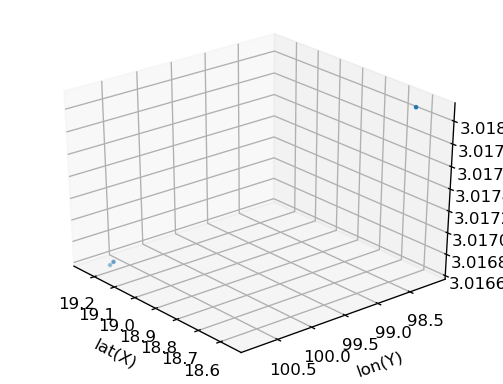

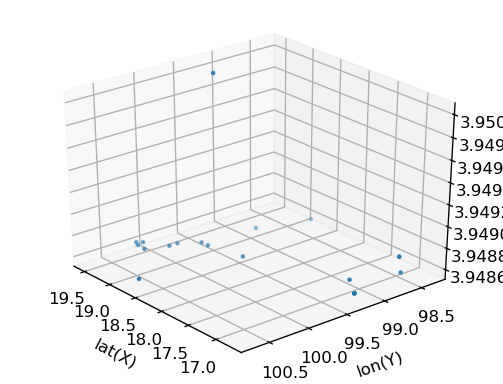

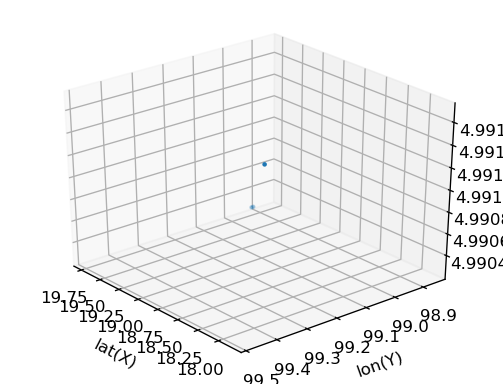

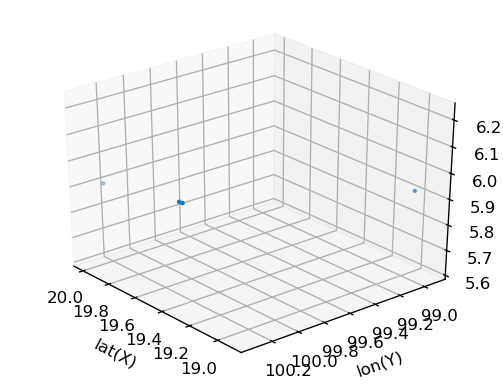

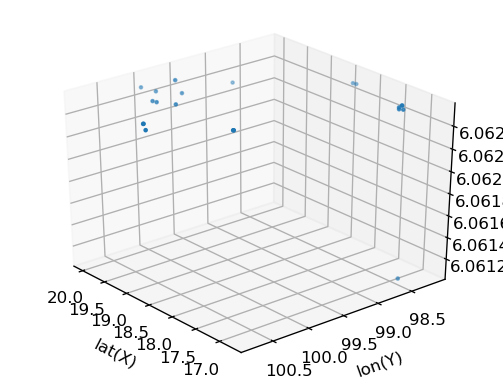

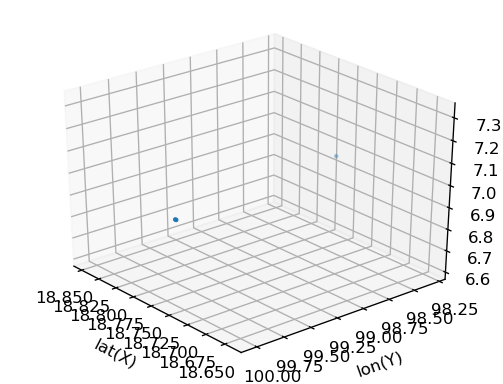

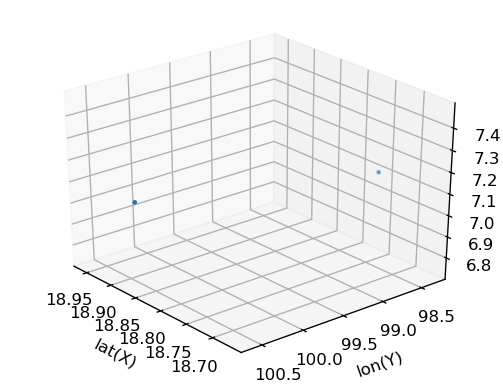

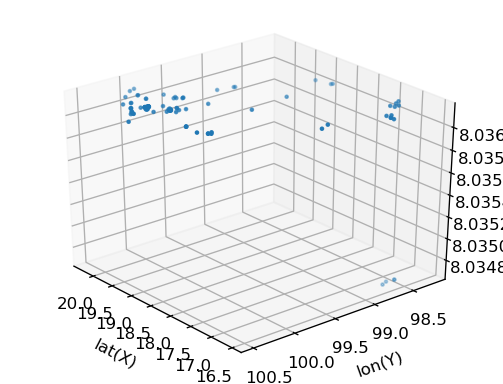

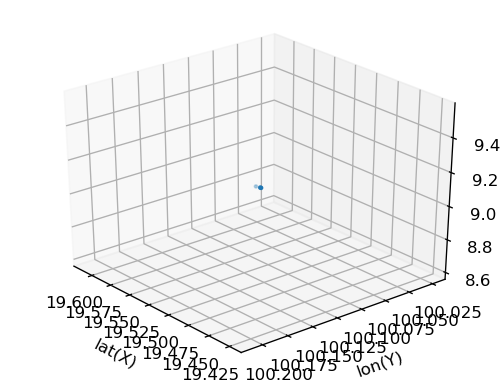

In [186]:
# Make a Axes3D Groupby Hour in 5 days

for i in range(len(hour_df_splitted)) :
    if hour_df_splitted[i].empty == False :
        df_hour = hour_df_splitted[i]
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(df_hour['LATITUDE'], df_hour['LONGITUDE'], df_hour['UNIXTIME']/43200, s=3)
        ax.view_init(azim=140)
        ax.set_xlabel('lat(X)')
        ax.set_ylabel('lon(Y)')
        ax.set_zlabel('day(Z)')
        ax.set_xlim(df_hour['LATITUDE'].min()-0.1,df_hour['LATITUDE'].max()+0.1)
        ax.set_ylim(df_hour['LONGITUDE'].min()-0.1,df_hour['LONGITUDE'].max()+0.1)

        plt.show()